In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from feature_create import FeaturesCreate
from fc_models import CatboostModel

portfolio = pd.read_csv('data/portfolio.csv')
portfolio = portfolio.astype({'Date': 'datetime64[s]'})

stocks = pd.read_csv('data/stocks.csv')
stocks = stocks.astype({'Date': 'datetime64[s]'})

In [3]:
A = FeaturesCreate(portfolio)
A.mouth_features()
A.diff_price_features(diff_steps=25, price_col='portfolio')
A.days_features(first_obs_day='monday')
portfolio = A.data

In [4]:
X = portfolio.iloc[:-50, 2:]
y = portfolio.iloc[:-50, 1].values

X_test = portfolio.iloc[-50:, 2:]
y_test = portfolio.iloc[-50:, 1].values

B = CatboostModel(n_splits=20, iterations=500, depth=4)
B.fit(X, y)
preds = B.predict(X_test)

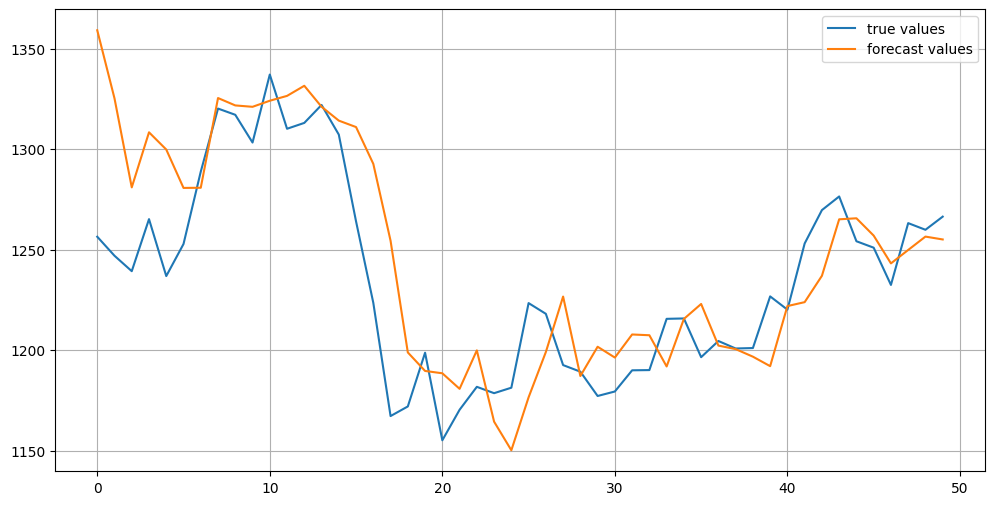

In [6]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(y_test, label='true values')
plt.plot(preds, label='forecast values')
plt.legend()
plt.show()

In [7]:
from risk_models import parametric, historical, monte_carlo, garch

In [11]:
alpha = np.array([0.05])

var_h, es_h = historical(preds, alpha)
var_h, es_h

(-0.03330724139697654, -0.040463287411759946)

In [12]:
var_p, es_p = parametric(preds, np.array([0.05]), alpha)
var_p, es_p

(-0.0840066196933157, -0.0840066196933157)

In [13]:
var_mc, es_mc = monte_carlo(preds, alpha)
var_mc, es_mc

(-1.6593798894707785, -13.930834794704833)

In [14]:
var_g, es_g = garch(preds, alpha)
var_g, es_g

(-0.02129423331102792, -0.03346031205727364)

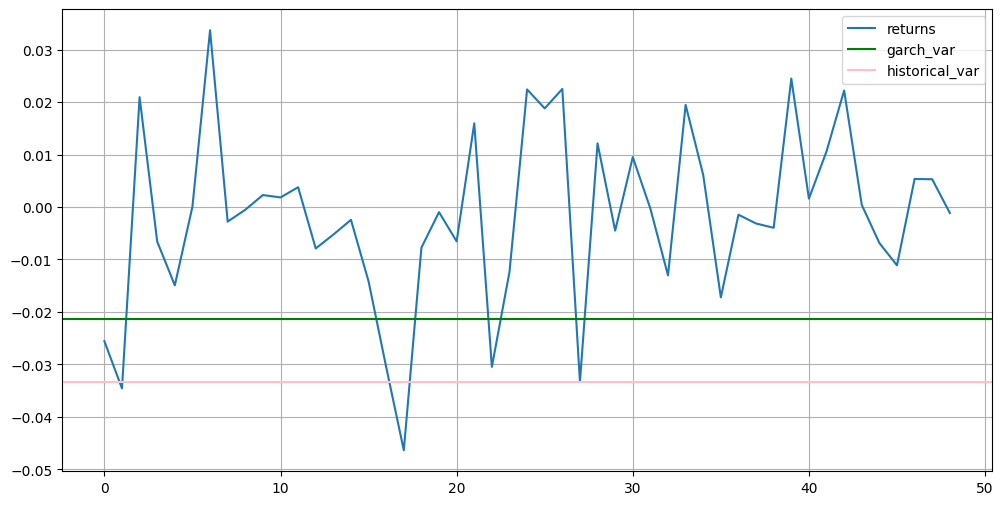

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(np.diff(preds) / preds[1:], label='returns')
plt.axhline(var_g, color='green', label='garch_var')
# plt.axhline(var_mc, color='orange')
# plt.axhline(var_p, color='black')
plt.axhline(var_h, color='pink', label='historical_var')
plt.grid()
plt.legend()
plt.show()

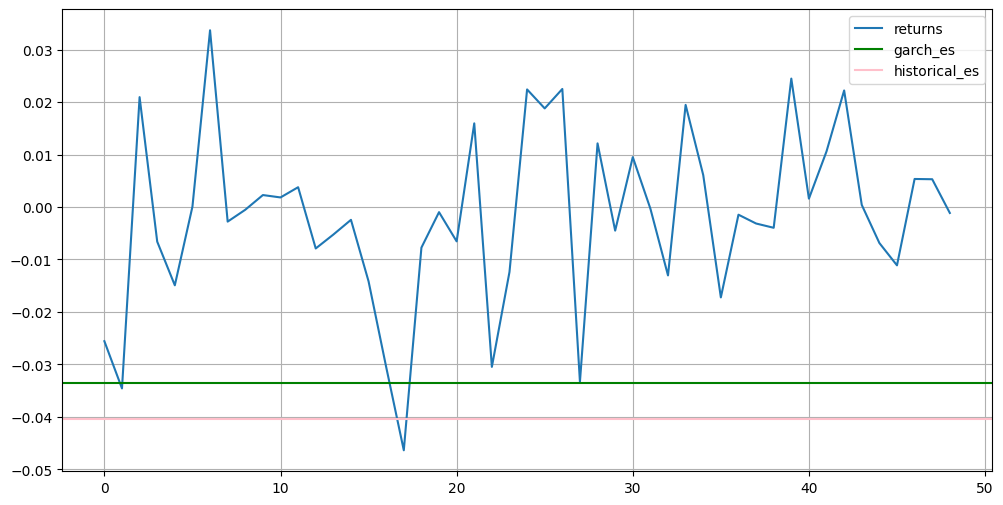

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(np.diff(preds) / preds[1:], label='returns')
plt.axhline(es_g, color='green', label='garch_es')
# plt.axhline(var_mc, color='orange')
# plt.axhline(var_p, color='black')
plt.axhline(es_h, color='pink', label='historical_es')
plt.grid()
plt.legend()
plt.show()